In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv(r'C:\Users\pavan\Desktop\data science\linear regression\insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


male =0 
female=1

In [ ]:

def fun(val):
    if val=='male':
        return 0
    else:
        return 1
    
df['sex']=df['sex'].apply(fun)

se=0
sw=1
nw=2
ne=3

In [ ]:
def fun1(val):
    if val=='southeast':
        return 0
    elif val=='southwest':
        return 1
    elif val=='northwest':
        return 2
    else:
        return 3
    

df['region']=df['region'].apply(fun1)

no=0
yes=1

In [ ]:

def smoker(val):
    if val=='no':
        return 0
    else:
        return 1
    
df['smoker']=df['smoker'].apply(smoker)

<Axes: >

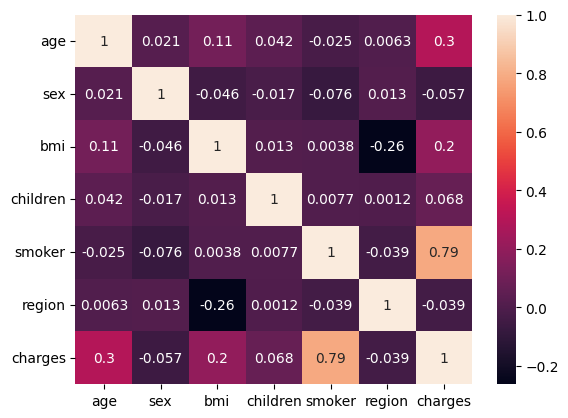

In [ ]:
cor=df.corr(numeric_only=True)
sns.heatmap(cor,annot=True)

1) smoker column is strongly correlated with target column chargers 79%..i.e as smokers increses charges increases --> strong relation

2) bmi and age column is weakly coorelated with target column charges with 20% and 30% respectively

3) sex ,region and childern  columns are having <20%  weakly/no relation correlated with target varaible charges

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error

In [ ]:
x=df.drop(columns=['charges'])
y=df['charges']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
yPred_train=model.predict(x_train)
train_acc=r2_score(y_train,yPred_train)
print('train accuracy',train_acc)

train accuracy 0.7415700001111735


the Training Accuracy stands at 74% i.e 74% of trained data is prediced correctly and remaining 26 % of training data is wrongly predicted

In [ ]:
ypred_test=model.predict(x_test)
test_acc=r2_score(y_test,ypred_test)
print('test accuracy',test_acc)

test accuracy 0.7839279776463969


the Testing Accuracy stands at 78% i.e 78% of testing data is prediced correctly and remaining 22 % of testing data is wrongly predicted


the overall performance of model is average,even though the model is good fit

In [ ]:
model.coef_

array([2.56600616e+02, 1.85353207e+01, 3.39184210e+02, 4.23674513e+02,
       2.36702619e+04, 2.41362103e+02])

In [ ]:
model.intercept_

np.float64(-12819.309317153178)

In [ ]:
mean_squared_error(y_test,y_pred)

33544907.381259013

In [ ]:
rmse=root_mean_squared_error(y_test,y_pred)
print( 'rmse value',rmse)

rmse value 5791.796559035807


In [ ]:
targetmean=y_test.mean()

In [ ]:
print(' test mse evaluation',rmse/targetmean)


 test mse evaluation 0.44661127044917415


since the mse value is >40% the model is predicting >40% of data wrong..